# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [8]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Unpacking objects: 100% (34/34), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
import pandas as pd

In [12]:
! ls visualization/assignment/data

CBO_data.pdf           college_completion.csv unemployment.xlsx
airbnb_hw.csv          sharks.csv


***1.) Load the ./data/college_completion.csv data with Pandas.***

In [13]:
#Load the data
college_df = pd.read_csv("./visualization/assignment/data/college_completion.csv")

***2.) What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.***

In [16]:
#look at the first 5 rows of the data
college_df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [45]:
#Look at the summary stats of the data
college_df.describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [18]:
#Find the dimensions of the dataframe
college_df.shape

(3798, 63)

***3.) Cross tabulate control and level. Describe the patterns you see***

In [20]:
#find the counts of the two variables
control_level_df = pd.crosstab(college_df.level, college_df.control)
control_level_df

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


***4.) For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description***

In [21]:
#import the necessary packages
import matplotlib.pyplot as plt

(array([929., 658., 513., 381., 296., 267., 187., 116.,  94.,  26.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

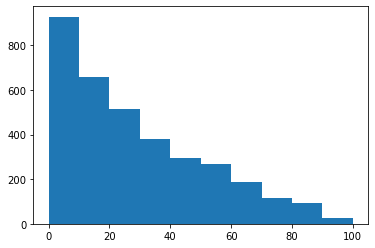

In [23]:
#plot the histogram of grad_100_value
plt.hist(college_df.grad_100_value, bins=10)

/Users/johnjordan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


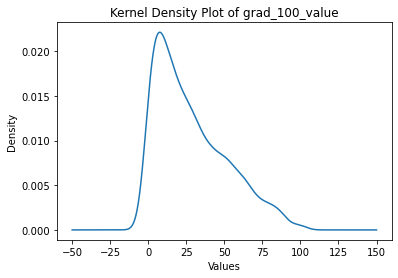

In [52]:
#create the kernel density plot
college_df['grad_100_value'].plot.kde()

#add titles and lables
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of grad_100_value')

#print the plot
plt.show()

<AxesSubplot:>

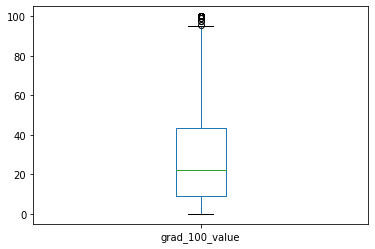

In [47]:
#create the boxplot
college_df.boxplot(column=["grad_100_value"], grid=False)

In [53]:
#statistical description using the describe function
college_df.describe()

,index,unitid,long_x,lat_y,student_count,awards_per_value,awards_per_state_value,awards_per_natl_value,exp_award_value,exp_award_state_value,...,vsa_grad_elsewhere_after4_transfer,vsa_enroll_after4_transfer,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,cohort_size
count,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3.467000e+03,3467.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,3467.000000,3467.000000,3467.000000
mean,1842.107586,218822.139602,-90.908475,38.240671,4670.397750,23.043928,22.730112,22.361061,6.680864e+04,61784.241996,...,6.442222,12.233704,8.641852,57.960370,9.705926,3.001481,5.909630,34.817421,235.824632,658.306028
std,1066.957370,98920.480349,15.732657,4.955804,7430.160531,10.246591,6.487217,4.950360,1.117306e+05,33772.928454,...,3.606922,6.220198,3.919950,16.368681,4.641213,2.158996,2.988662,28.797577,153.021439,961.782580
min,0.000000,100654.000000,-159.395966,19.699720,23.000000,0.500000,3.200000,16.500000,0.000000e+00,12346.000000,...,-13.400000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,929.500000,154616.000000,-97.247487,34.611083,667.000000,17.200000,19.000000,16.500000,3.277450e+04,35515.000000,...,4.700000,8.325000,6.200000,51.050000,7.500000,1.525000,4.200000,14.000000,106.000000,131.000000
50%,1836.000000,196042.000000,-86.817687,39.049813,1968.000000,21.100000,22.000000,22.500000,5.183700e+04,54356.000000,...,6.400000,11.800000,8.300000,59.500000,9.700000,2.700000,5.700000,25.000000,169.000000,356.000000
75%,2743.500000,229429.500000,-79.694875,41.647691,5501.000000,25.800000,24.200000,22.500000,7.890350e+04,79796.000000,...,7.800000,15.075000,10.800000,68.075000,11.900000,3.900000,7.200000,48.000000,343.000000,782.500000
max,3797.000000,475291.000000,-67.243306,71.324702,170144.000000,131.100000,59.900000,32.800000,5.282095e+06,188870.000000,...,29.800000,64.500000,25.300000,89.300000,32.000000,17.200000,21.300000,116.000000,517.000000,16229.000000


***5.) For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?***

In [57]:
#import seaborn
import seaborn as sns

# Work on This

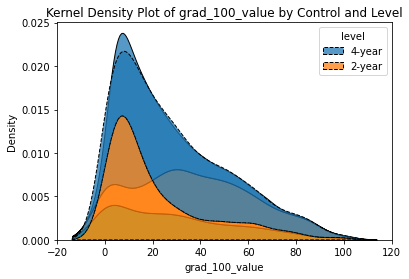

In [62]:
sns.kdeplot(data=college_df, x="grad_100_value", hue="control", multiple="stack")
sns.kdeplot(data=college_df, x="grad_100_value", hue="level", multiple="stack", linestyle="--")

plt.title("Kernel Density Plot of grad_100_value by Control and Level")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()

In [63]:
#describe the group statstical calculations
college_df.groupby(['control', 'level'])['grad_100_value'].describe()

count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                       4-year  21.8  33.800   86.3

***6.) Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?***

In [66]:
#create the new column
college_df['controlXlevel'] = college_df['level'] + ',' + college_df['control']

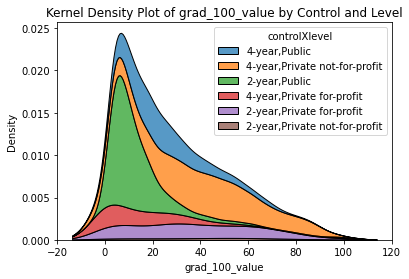

In [68]:
#plot the grouped density plot
sns.kdeplot(data=college_df, x = 'grad_100_value', hue = 'controlXlevel', multiple = 'stack')
plt.title("Kernel Density Plot of grad_100_value by Control and Level")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()

***7.) Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.***

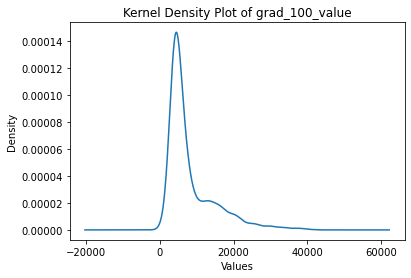

In [69]:
#plot the kde plot of just aid_value
college_df['aid_value'].plot.kde()

#add titles and lables
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Plot of aid_value')

#print the plot
plt.show()

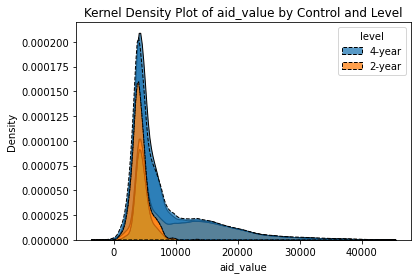

'\nsns.kdeplot(data=college_df, x="grad_100_value", hue="controlXlevel", multiple="stack")\n\nplt.title("Kernel Density Plot of grad_100_value by Control and Level")\nplt.xlabel("grad_100_value")\nplt.ylabel("Density")\nplt.show()\n'

In [72]:
#create the grouped plt by control and level
sns.kdeplot(data=college_df, x = 'aid_value', hue = 'control', multiple='stack')
sns.kdeplot(data=college_df, x = 'aid_value', hue = 'level', multiple='stack', linestyle = '--')

plt.title("Kernel Density Plot of aid_value by Control and Level")
plt.xlabel("aid_value")
plt.ylabel("Density")
plt.show()

'''
sns.kdeplot(data=college_df, x="grad_100_value", hue="controlXlevel", multiple="stack")

plt.title("Kernel Density Plot of grad_100_value by Control and Level")
plt.xlabel("grad_100_value")
plt.ylabel("Density")
plt.show()
'''

In [73]:
#get summary stats after grouping aid_value by control and level
college_df.groupby(['control', 'level'])['aid_value'].describe()

count          mean          std     min  \
control                level                                               
Private for-profit     2-year   460.0   4548.886957  1273.908071   294.0   
                       4-year   318.0   4829.050314  1620.406400  2217.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1121.0  15111.199822  7549.163907  1450.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   573.0   6717.588133  2345.658634  2685.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3814.75   4286.5   5104.25   9727.0  
                       4-year  3908.00   4491.5   5236.00  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9913.00  14079.0  19284.00  41580.0  
Public                 2-year  3311.25   3943.5   4762.00   9809.0  
                       4-year  5176.00   6181.0   7507.00  17299.0

***8.) Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?***

<AxesSubplot:xlabel='grad_100_value', ylabel='aid_value'>

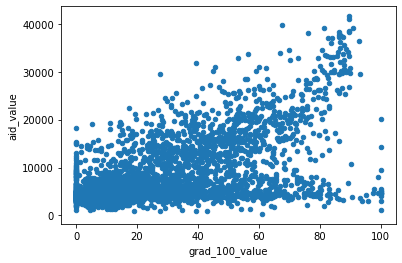

In [74]:
#create the simple scatter plot
college_df.plot.scatter(x = 'grad_100_value', y = 'aid_value')

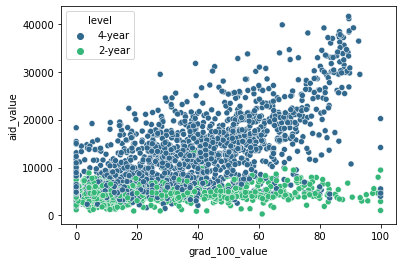

In [81]:
#scatter plot grouped by level
sns.scatterplot(data=college_df, x = 'grad_100_value', y = 'aid_value', hue = 'level', palette = 'viridis')
plt.show()

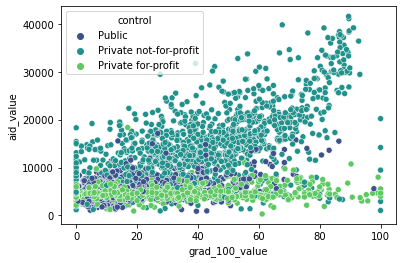

In [82]:
#scatter plot grouped by control
sns.scatterplot(data=college_df, x = 'grad_100_value', y = 'aid_value', hue = 'control', palette = 'viridis')
plt.show()

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

***1.) load the data set***

In [93]:
med_summer_2021 = pd.read_csv("/Users/johnjordan/Desktop/Medicare Current Beneficiary Survey - Survey File/2021/SFPUF2021_Data/sfpuf2021_3_summer.csv")
med_summer_2021.head()

,PUF_ID,SURVEYYR,VERSION,CVS_ONEDOSE,CVS_TWODOSE,CVS_VCNUMS,FIS_FOODLAST,FIS_AFFDMEAL,FIS_SKIPMEAL,FIS_EATLESS,...,PUFS091,PUFS092,PUFS093,PUFS094,PUFS095,PUFS096,PUFS097,PUFS098,PUFS099,PUFS100
0,21000003,2021,1,1,1,3.0,2,3,2,1,...,1514.467942,8667.712494,2051.744906,2212.585993,9580.938257,1827.471189,9757.388299,2221.541391,7313.791799,1509.383145
1,21000004,2021,1,1,1,4.0,2,3,2,2,...,29370.241003,4344.868949,3346.069483,3144.425325,4794.225838,20464.032605,23459.065322,20606.019549,20722.767270,22192.119313
2,21000012,2021,1,1,1,3.0,2,1,2,2,...,20825.975609,25827.374203,15999.055755,3477.538940,3019.196592,3424.636870,2936.556467,24171.454536,19156.542361,18290.764044
3,21000026,2021,1,1,1,4.0,2,3,D,2,...,939.296224,5186.072054,836.601141,639.612412,4761.177749,864.743176,5644.715691,3379.378686,865.485822,987.890486
4,21000031,2021,1,1,1,3.0,3,3,2,2,...,3113.197345,3933.853896,3015.397706,17114.935540,18612.310594,20477.720949,18619.382715,19503.062566,15117.249425,2951.475626


***2.) Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.***

The data dictionary does not discuss how it handles any missing values, for neither numeric or categorical variables. However, the dictionary does document the potential unique values for each variable, the description of what each variable means, and the distribution of the values of each variable.

***3.) Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook***

I chose the variables CVS_ONEDOSE, CVS_TWODOSE, and FIS_AFFDMEAL because I was curious to see if there was any correlation between the number of covid shots that a person recieves and their overall ability to supply themselves with healthy food.

In [112]:
#drop the unnecesary columns (all of the PUFS)
med_summer_2021 = med_summer_2021.iloc[:, :39]

In [113]:
print(med_summer_2021.columns)

Index(['PUF_ID', 'SURVEYYR', 'VERSION', 'CVS_ONEDOSE', 'CVS_TWODOSE',
       'CVS_VCNUMS', 'FIS_FOODLAST', 'FIS_AFFDMEAL', 'FIS_SKIPMEAL',
       'FIS_EATLESS', 'RXS_PDEASY', 'RXS_PDKNOW', 'RXS_PDSATSFP',
       'RXS_PDCONFIP', 'RXS_RXUSEPLN', 'RXS_RXCOSTLY', 'RXS_RXAMNTLY',
       'RXS_PDNOCVG', 'RXS_RXCHGMED', 'RXS_RXSWTCH', 'RXS_RXPARTIC',
       'RXS_PDRXRATP', 'RXS_MCAMTPAY', 'RXS_MCDRGLST', 'RXS_MCFNDPCY',
       'RXS_MCRECPLN', 'RXS_GENERRX', 'RXS_MAILRX', 'RXS_DOSESRX',
       'RXS_SKIPRX', 'RXS_DELAYRX', 'RXS_SAMPLERX', 'RXS_COMPARRX',
       'RXS_NOFILLRX', 'RXS_SPENTLRX', 'RXS_CHAINRX', 'RXS_STOPRX',
       'RXS_CREDRX', 'RXS_NOINSRX'],
      dtype='object')


In [114]:
chosen_variables = med_summer_2021[['CVS_ONEDOSE', 'CVS_TWODOSE', 'FIS_AFFDMEAL']]

In [115]:
chosen_variables.head()

,CVS_ONEDOSE,CVS_TWODOSE,FIS_AFFDMEAL
0,1,1,3
1,1,1,3
2,1,1,1
3,1,1,3
4,1,1,3


In [120]:
#check for the unique values of each column
# Get unique values for each column individually
unique_cvs_onedose = med_summer_2021['CVS_ONEDOSE'].unique()
unique_cvs_twodose = med_summer_2021['CVS_TWODOSE'].unique()
unique_fis_affdmeal = med_summer_2021['FIS_AFFDMEAL'].unique()
print(unique_cvs_onedose) 
print(unique_cvs_twodose)
print(unique_fis_affdmeal)

['1' '2' 'R' 'D']
['1' '2' '3' 'R' 'D']
['3' '1' '2' 'R' 'D']


In [129]:
#change all R and D values to 4 nd 5 respectively and to ints to make a boxplot
chosen_variables.loc[:, 'CVS_ONEDOSE'] = chosen_variables['CVS_ONEDOSE'].replace({'R': 4, 'D': 5}).astype(int)
chosen_variables.loc[:, 'CVS_TWODOSE'] = chosen_variables['CVS_TWODOSE'].replace({'R': 4, 'D': 5}).astype(int)
chosen_variables.loc[:, 'FIS_AFFDMEAL'] = chosen_variables['FIS_AFFDMEAL'].replace({'R': 4, 'D': 5}).astype(int)

In [130]:
# Check variable data types
print(chosen_variables.dtypes)

CVS_ONEDOSE     int64
CVS_TWODOSE     int64
FIS_AFFDMEAL    int64
dtype: object


***4.) make a boxplot and bargraph of each variable***

In [145]:
# Plot
chosen_variables[['CVS_ONEDOSE', 'CVS_TWODOSE', 'FIS_AFFDMEAL']].plot.bar(grid=False)

# Customize the plot
plt.title('Bar Plot for CVS_ONEDOSE, CVS_TWODOSE, and FIS_AFFDMEAL')
plt.xlabel('Values')  # You can change this to a relevant label
plt.ylabel('Counts')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x116bee430> (for post_execute):


KeyboardInterrupt: 

***5.) Create a KDE***

<AxesSubplot:xlabel='CVS_ONEDOSE', ylabel='Density'>

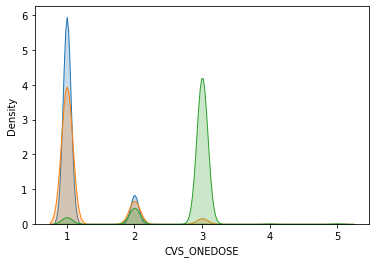

In [151]:
# Plot the KDE for each variable with transparency
sns.kdeplot(data=chosen_variables['CVS_ONEDOSE'], fill=True, label='CVS_ONEDOSE')
sns.kdeplot(data=chosen_variables['CVS_TWODOSE'], fill=True, label='CVS_TWODOSE')
sns.kdeplot(data=chosen_variables['FIS_AFFDMEAL'], fill=True, label='FIS_AFFDMEAL')

No, there does not appear to be a need to transform the variables

***6.) Create the scatter plot***

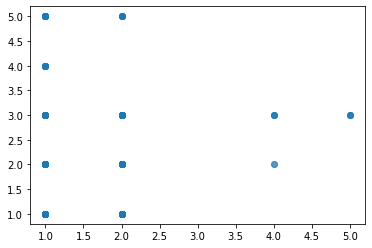

In [154]:
#look at the relationship between ability to afford healthy food and the ability to get a COVID shot
plt.scatter(chosen_variables['CVS_ONEDOSE'], chosen_variables['FIS_AFFDMEAL'], label='CVS_ONEDOSE vs FIS_AFFDMEAL', alpha=0.5)

All of the variables, understandably, fall in very specific buckets. Furthermore, as a scatter plot, it is hard to see the amount of each relationship between variables. There are many plots that I think could help us look at the relationships such as a heatmap.

***7.) Crosstab the variables***

In [156]:
# Create the crosstab
crosstab_result = pd.crosstab(chosen_variables['CVS_ONEDOSE'], [chosen_variables['FIS_AFFDMEAL'], chosen_variables['CVS_TWODOSE']])

print(crosstab_result)

FIS_AFFDMEAL    1            2                 3                  4   5   
CVS_TWODOSE     1   2   3    1    2   3  4     1    2    3  4  5  1   1  2
CVS_ONEDOSE                                                               
1             202  11  12  491   20  44  0  5508   87  203  0  0  9  11  0
2               0  73   0    0  156   0  0     0  690    0  0  0  0   0  6
4               0   0   0    0    0   0  2     0    0    0  4  0  0   0  0
5               0   0   0    0    0   0  0     0    0    0  0  4  0   0  0


When looking at the results of the crosstab, one can see that the most common instances by far are CVS_ONEDOSE =1, CVS_TWODOSE = 1, and FIS_AFFDMEAL = 3. This means that the most common scenario is a person who recieves both a first COVID shot and a second, and never faces problems getting healthy food. However, I found it interesting that one of the other most common scenarios was a person recieving both rounds of shots, but often can not eat healthily. I found this interesting because it appears that COVID shots are prioritized over food. 